In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Use double backslashes to avoid unicode escape issues
print(os.listdir('C:\\Users\\uppal\\Downloads\\archive (1)\\leapGestRecog\\leapGestRecog'))


['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']


In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.image as mpimg 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display
path='C:\\Users\\uppal\\Downloads\\archive (1)\\leapGestRecog\\leapGestRecog'
folders=os.listdir(path)
folders=set(folders)

import codecs
import json


different_classes=os.listdir(path+'/'+'00')
different_classes=set(different_classes)




print("The different classes that exist in this dataset are:")
print(different_classes,sep='\n')




The different classes that exist in this dataset are:
{'09_c', '06_index', '10_down', '08_palm_moved', '05_thumb', '01_palm', '02_l', '04_fist_moved', '03_fist', '07_ok'}


In [4]:
classes=dict()
names_of_classes=dict()
for i in different_classes:
    classes[int(i.split('_')[0])]='_'.join(i.split('_')[1:])
    names_of_classes['_'.join(i.split('_')[1:])]=int(i.split('_')[0])




print(classes)





{9: 'c', 6: 'index', 10: 'down', 8: 'palm_moved', 5: 'thumb', 1: 'palm', 2: 'l', 4: 'fist_moved', 3: 'fist', 7: 'ok'}


In [5]:
x=[]
z=[]
y=[]#converting the image to black and white
threshold=200
import cv2


for i in folders:
    print('***',i,'***')
    subject=path+'/'+i
    subdir=os.listdir(subject)
    subdir=set(subdir)
    for j in subdir:
        print(j)
        images=os.listdir(subject+'/'+j)
        for k in images:
            results=dict()
            results['y']=j.split('_')[0]
            img = cv2.imread(subject+'/'+j+'/'+k,0)
            img=cv2.resize(img,(int(160),int(60)))
            
            ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            imgD=np.asarray(img,dtype=np.float64)
            z.append(imgD)
            imgf=np.asarray(imgf,dtype=np.float64)
            x.append(imgf)
            y.append(int(j.split('_')[0]))
            results['x']=imgf

print(list(set(y)))

*** 00 ***
09_c
06_index
10_down
08_palm_moved
05_thumb
01_palm
02_l
04_fist_moved
03_fist
07_ok
*** 05 ***
09_c
06_index
10_down
08_palm_moved
05_thumb
01_palm
02_l
04_fist_moved
03_fist
07_ok
*** 01 ***
09_c
06_index
10_down
08_palm_moved
05_thumb
01_palm
02_l
04_fist_moved
03_fist
07_ok
*** 03 ***
09_c
06_index
10_down
08_palm_moved
05_thumb
01_palm
02_l
04_fist_moved
03_fist
07_ok
*** 06 ***
09_c
06_index
10_down
08_palm_moved
05_thumb
01_palm
02_l
04_fist_moved
03_fist
07_ok
*** 02 ***
09_c
06_index
10_down
08_palm_moved
05_thumb
01_palm
02_l
04_fist_moved
03_fist
07_ok
*** 08 ***
09_c
06_index
10_down
08_palm_moved
05_thumb
01_palm
02_l
04_fist_moved
03_fist
07_ok
*** 09 ***
09_c
06_index
10_down
08_palm_moved
05_thumb
01_palm
02_l
04_fist_moved
03_fist
07_ok
*** 07 ***
09_c
06_index
10_down
08_palm_moved
05_thumb
01_palm
02_l
04_fist_moved
03_fist
07_ok
*** 04 ***
09_c
06_index
10_down
08_palm_moved
05_thumb
01_palm
02_l
04_fist_moved
03_fist
07_ok
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10

Class Label: 1


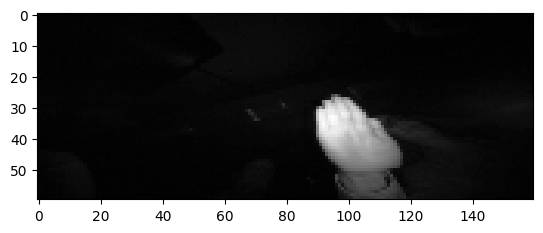

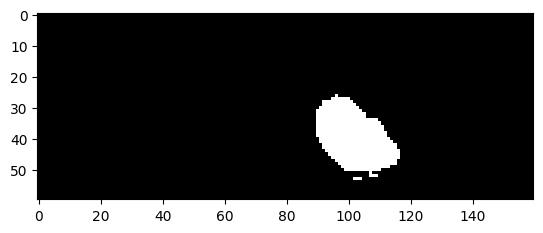

Class Label: 2


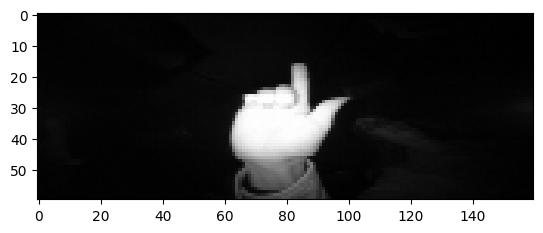

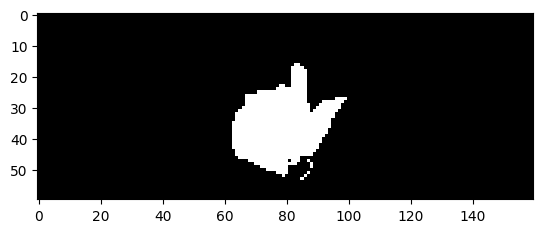

Class Label: 3


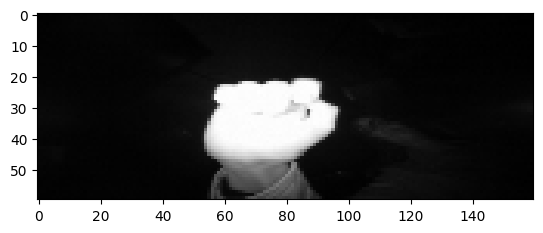

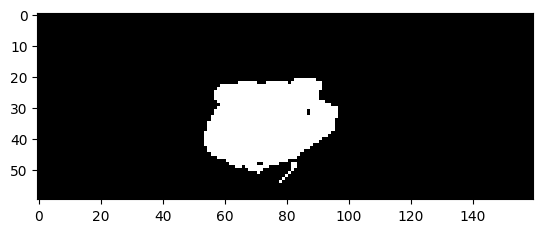

Class Label: 4


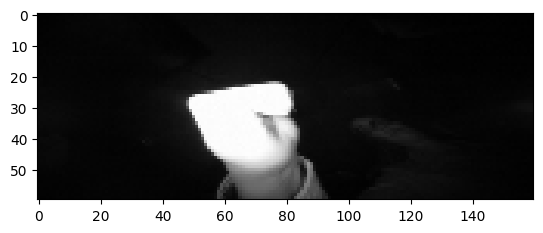

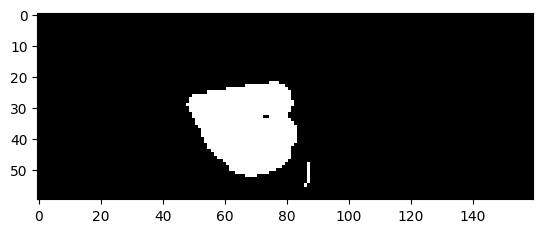

Class Label: 5


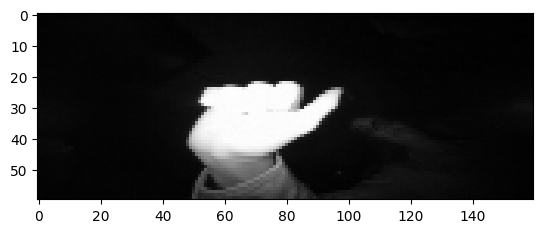

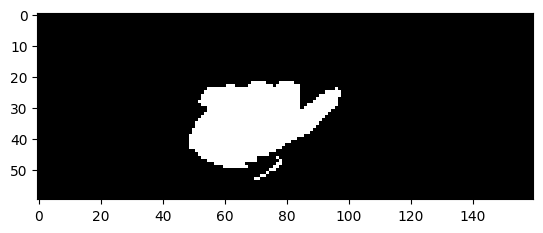

Class Label: 6


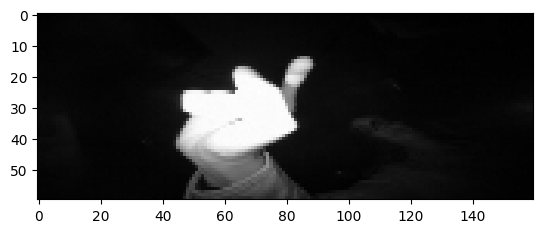

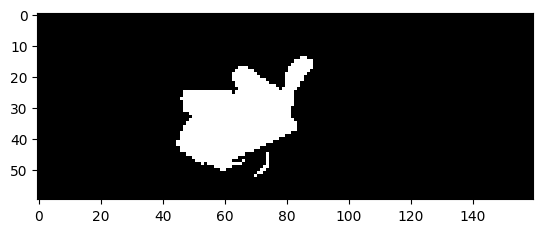

Class Label: 7


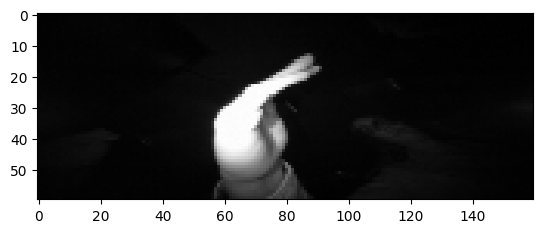

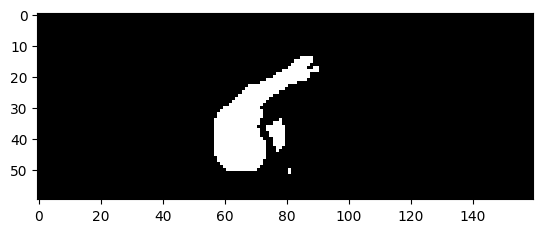

Class Label: 8


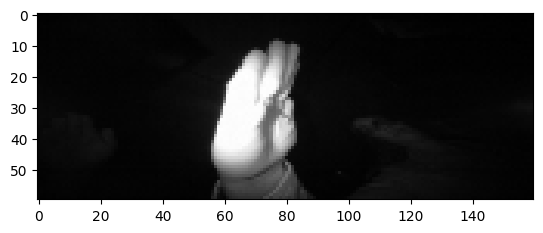

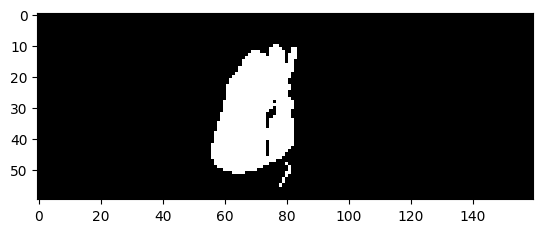

Class Label: 9


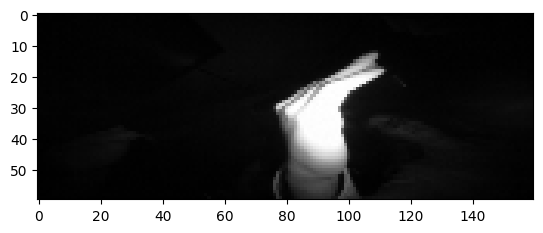

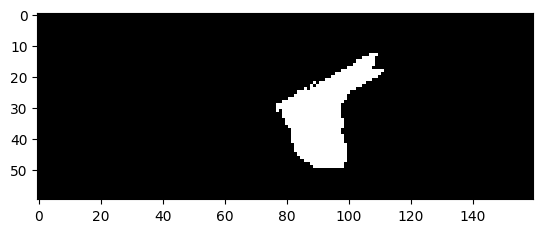

Class Label: 10


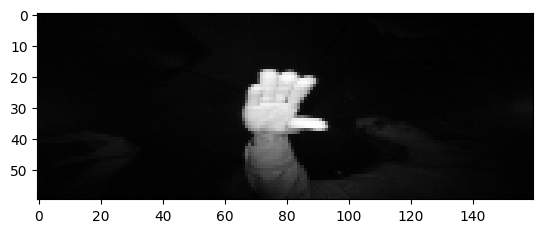

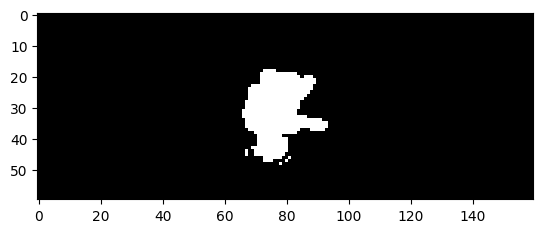

In [6]:
l = []
list_names = []
for i in range(10):
    l.append(0)
for i in range(len(x)):
    if(l[y[i] - 1] == 0):
        l[y[i] - 1] = i
        if(len(np.unique(l)) == 10):
            break
for i in range(len(l)):
    %matplotlib inline
    print("Class Label: " + str(i + 1))
    plt.imshow(np.asarray(z[l[i]]), cmap  =cm.gray)
    plt.show()
    plt.imshow(np.asarray(x[l[i]]), cmap = cm.gray)     
    plt.show()

In [7]:
x=np.array(x)
y=np.array(y)
y = y.reshape(len(x), 1)
print(x.shape)
print(y.shape)
print(max(y),min(y))

(20000, 60, 160)
(20000, 1)
[10] [1]


In [8]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
import keras
from keras.utils import to_categorical
def one_hot_encoded(y):
    p=list(np.unique(y))
    dictionary=dict()
    final_result=[]
    for i in range(len(p)):
        dictionary[p[i]]=i
    for i in y:
        actual=[0 for j in range(len(p))]
        actual[dictionary[i[0]]]=1
        final_result.append(actual)
    return np.array(final_result)
            
y_data = one_hot_encoded(y)
print(y_data[0])
print(type(y_data))

[0 0 0 0 0 0 0 0 1 0]
<class 'numpy.ndarray'>


In [10]:
x_data = x.reshape((len(x), 60, 160, 1))

x_data/=255
print(x_data.shape)

(20000, 60, 160, 1)


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 60, 160, 1)
(2000, 60, 160, 1)
(16000, 10)
(2000, 10)


In [13]:
from keras import layers
from keras import models

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(60, 160,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\uppal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 63s 115ms/step - accuracy: 0.6062 - loss: 0.1925 - val_accuracy: 0.9990 - val_loss: 0.0017
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 114ms/step - accuracy: 0.9965 - loss: 0.0047 - val_accuracy: 0.9960 - val_loss: 0.0039
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 112ms/step - accuracy: 0.9987 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 3.1680e-04
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 56s 112ms/step - accuracy: 0.9993 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 5.4855e-04
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 80s 109ms/step - accuracy: 0.9994 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 2.0382e-04
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 54s 108ms/step - accuracy: 0.9993 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 1.6989e-04
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 85s 114ms/step - accuracy: 0.9997 - loss: 4.5220e-04 - val_accuracy: 1.0000 - val_loss: 1.0450e-05
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 55s 109ms/step - ac

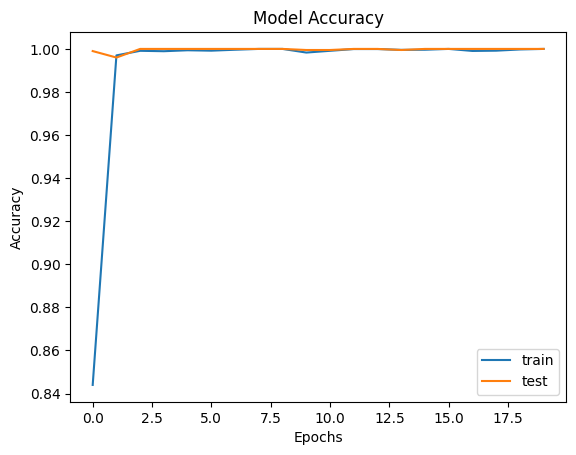

In [15]:
history = model.fit(x_train, y_train, epochs =20, batch_size=32, validation_data=(x_test, y_test))

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

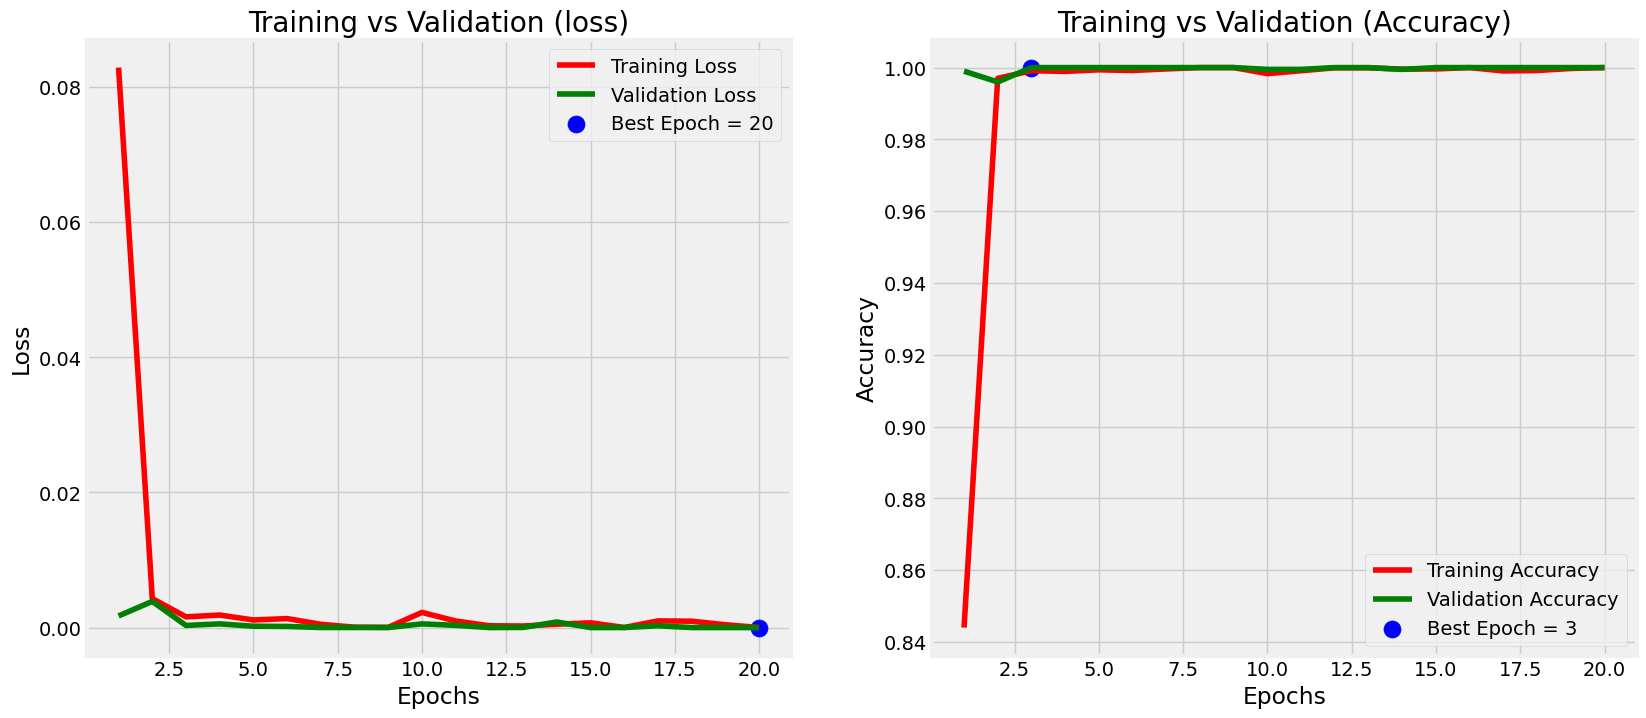

In [16]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r', label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss +1 , val_lowest , s = 150 , c = 'blue' , label = loss_label)
plt.title('Training vs Validation (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r', label= 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s= 150 , c = 'blue' , label= acc_label)
plt.title('Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show();

In [17]:
model.save('cnn_results.keras')

In [18]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 1.0000 - loss: 2.3008e-07
Accuracy:1.0


In [19]:
#calculate loss and accuracy on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 1.0000 - loss: 2.3008e-07
Test accuracy: 100.00%


In [20]:
# Load the trained model
from keras.models import load_model

# Load the trained model
model = load_model('cnn_results.keras')

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predictions
y_pred = model.predict(x_test)

# Convert one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate test metrics
from sklearn.metrics import classification_report

# Classification report
print(classification_report(y_test_labels, y_pred_labels))


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 1.0000 - loss: 2.3008e-07
Test Loss: 1.9159631392540177e-07
Test Accuracy: 1.0
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       221
           2       1.00      1.00      1.00       178
           3       1.00      1.00      1.00       180
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00       208
           6       1.00      1.00      1.00       219
           7       1.00      1.00      1.00       206
           8       1.00      1.00      1.00       181
           9       1.00      1.00      1.00       214

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


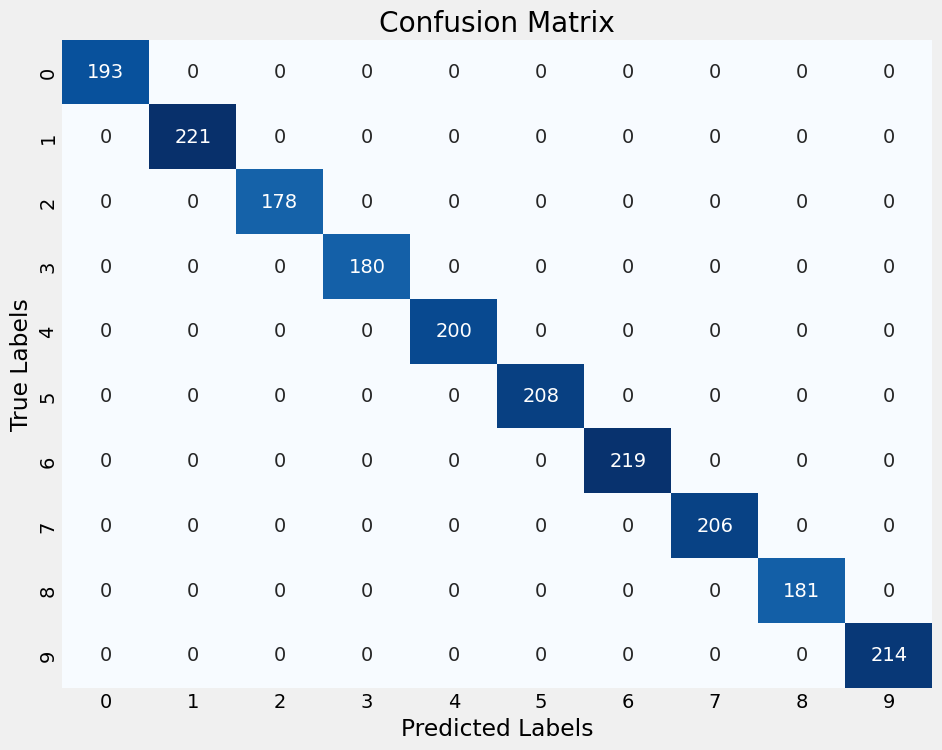

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 78, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 39, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 37, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 18, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 18, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 16, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 880,640 (3.36 MB)

 Trainable params: 293,546 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 587,094 (2.24 MB)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       221
           2       1.00      1.00      1.00       178
           3       1.00      1.00      1.00       180
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00       208
           6       1.00      1.00      1.00       219
           7       1.00      1.00      1.00       206
           8       1.00      1.00      1.00       181
           9       1.00      1.00      1.00       214

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Sample predictions:
True label: 2, Predicted label: 2
True label: 8, Predicted label: 8
True label: 4, Predicted label: 4
True label: 3, Predicted label: 3
True label: 3, Predicted label: 3
True label: 3, Predicted label: 3
True label: 1, Pr

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the trained model
from keras.models import load_model

# Load the trained model
model = load_model('cnn_results.keras')

# Predictions
y_pred = model.predict(x_test)

# Convert one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print model summary
model.summary()

# Classification report
print(classification_report(y_test_labels, y_pred_labels))

# Print sample predictions
print("Sample predictions:")
for i in range(10):
    print(f"True label: {y_test_labels[i]}, Predicted label: {y_pred_labels[i]}")

# Visualize some misclassified images
misclassified_indices = np.where(y_test_labels != y_pred_labels)[0]
if len(misclassified_indices) > 0:
    print("Misclassified images:")
    plt.figure(figsize=(15, 15))
    for i, index in enumerate(misclassified_indices[:9]):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x_test[index].reshape(60, 160), cmap="gray")
        plt.title(f"True: {y_test_labels[index]}, Pred: {y_pred_labels[index]}")
        plt.axis('off')
    plt.show()
else:
    print("No misclassified images found.")

# Final accuracy and loss
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
